In [131]:
import pandas as pd
file_path = "D:/New Projects/glassdoor_jobs.csv"  

df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [133]:
# Unnamed: remove zero column
df = df.drop(columns=["Unnamed: 0"])
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [135]:
# Salary Estimate 
df = df[df["Salary Estimate"] != "-1"]  # deleting record that do not have salary paid.

# Remove "Glassdoor est" and cleaning the salary
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: x.split("(")[0].strip())

# Check if salary has been cleared or not
df[["Salary Estimate"]].head()


,Salary Estimate
0,$53K-$91K
1,$63K-$112K
2,$80K-$90K
3,$56K-$97K
4,$86K-$143K


In [137]:

df["Min Salary"] = df["Salary Estimate"].apply(lambda x: int(x.replace("$", "").replace("K", "").split("-")[0]))
df["Max Salary"] = df["Salary Estimate"].apply(lambda x: int(x.replace("$", "").replace("K", "").split("-")[1]))


df[["Salary Estimate", "Min Salary", "Max Salary"]].head()


ValueError: invalid literal for int() with base 10: 'Employer Provided Salary:150'

In [139]:
print(df["Salary Estimate"].unique())


['$53K-$91K' '$63K-$112K' '$80K-$90K' '$56K-$97K' '$86K-$143K'
 '$71K-$119K' '$54K-$93K' '$86K-$142K' '$38K-$84K' '$120K-$160K'
 '$126K-$201K' '$64K-$106K' '$106K-$172K' '$46K-$85K' '$83K-$144K'
 '$102K-$190K' '$67K-$137K' '$118K-$189K' '$110K-$175K' '$64K-$111K'
 '$81K-$130K' '$73K-$119K' '$86K-$139K' '$63K-$105K' '$109K-$177K'
 '$63K-$110K' '$75K-$124K' '$34K-$61K' '$72K-$120K' '$93K-$149K'
 '$85K-$140K' '$77K-$135K' '$82K-$132K' '$83K-$137K' '$115K-$180K'
 '$74K-$138K' '$64K-$112K' '$68K-$129K' '$52K-$113K' '$110K-$150K'
 'Employer Provided Salary:$150K-$160K' '$158K-$211K' '$20K-$39K'
 '$56K-$117K' '$63K-$99K' '$68K-$114K' '$41K-$95K' '$86K-$144K'
 '$80K-$139K' '$56K-$95K' '$120K-$189K' '$111K-$176K' '$84K-$146K'
 '$107K-$172K' '$49K-$85K' '$61K-$109K' '$88K-$148K' '$60K-$99K'
 '$41K-$72K' '$96K-$161K' '$65K-$130K' '$52K-$81K' '$139K-$220K'
 '$50K-$102K' '$85K-$139K' '$74K-$122K' '$99K-$157K' '$79K-$222K'
 '$57K-$118K' '$86K-$141K' '$94K-$154K' '$37K-$76K' '$100K-$160K'
 '$55K-$100

In [209]:
def extract_salary(salary):
    salary = salary.lower()  # convert Lowercase 
    
    # Handle Invalid Salary 
    if "employer provided salary" in salary or "per hour" in salary:
        return None  
    
    salary = salary.replace("$", "").replace("(glassdoor est.)", "").strip()
    
    if "-" in salary:
        min_salary, max_salary = salary.split("-")
        
        # Remove"K" and Multiply by 1000 
        min_salary = int(min_salary.replace("k", "").strip()) * 1000
        max_salary = int(max_salary.replace("k", "").strip()) * 1000
        
        return min_salary, max_salary
    else:
        return None  # If it is '-' not then make it None

# Apply function to extract min and max salary
df["Salary Data"] = df["Salary Estimate"].apply(extract_salary)

# Put Min और Max in separate column
df["Min Salary"] = df["Salary Data"].apply(lambda x: x[0] if x else None)
df["Max Salary"] = df["Salary Data"].apply(lambda x: x[1] if x else None)

df.drop(columns=["Salary Data"], inplace=True)

print(df[["Salary Estimate", "Min Salary", "Max Salary"]].head(10))


   Salary Estimate  Min Salary  Max Salary
1       $63K-$112K       63000      112000
2        $80K-$90K       80000       90000
3        $56K-$97K       56000       97000
5       $71K-$119K       71000      119000
10     $126K-$201K      126000      201000
12     $106K-$172K      106000      172000
13       $46K-$85K       46000       85000
14      $83K-$144K       83000      144000
16      $67K-$137K       67000      137000
17     $118K-$189K      118000      189000


In [143]:
df["Average Salary"] = (df["Min Salary"] + df["Max Salary"]) / 2
print(df[["Salary Estimate", "Min Salary", "Max Salary", "Average Salary"]].head())


  Salary Estimate  Min Salary  Max Salary  Average Salary
0       $53K-$91K     53000.0     91000.0         72000.0
1      $63K-$112K     63000.0    112000.0         87500.0
2       $80K-$90K     80000.0     90000.0         85000.0
3       $56K-$97K     56000.0     97000.0         76500.0
4      $86K-$143K     86000.0    143000.0        114500.0


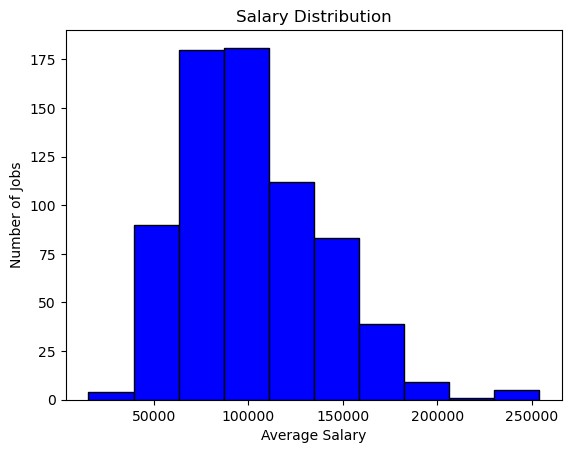

In [145]:
import matplotlib.pyplot as plt

plt.hist(df["Average Salary"], bins=10, color='blue', edgecolor='black')
plt.xlabel("Average Salary")
plt.ylabel("Number of Jobs")
plt.title("Salary Distribution")
plt.show()


In [147]:
high_paying_jobs = df[df["Max Salary"] > 100000]
print(high_paying_jobs)


                                        Job Title Salary Estimate  \
1                       Healthcare Data Scientist      $63K-$112K   
4                                  Data Scientist      $86K-$143K   
5                                  Data Scientist      $71K-$119K   
7                                  Data Scientist      $86K-$142K   
9                                  Data Scientist     $120K-$160K   
..                                            ...             ...   
949  Principal, Data Science - Advanced Analytics      $86K-$137K   
950      Sr Scientist, Immuno-Oncology - Oncology      $58K-$111K   
951                          Senior Data Engineer      $72K-$133K   
953                          Data Science Manager      $95K-$160K   
955     Research Scientist – Security and Privacy      $61K-$126K   

                                       Job Description  Rating  \
1    What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
4    Data Scientist\nAffinity Solutions

In [149]:
# df = pd.read_csv("your_file.csv")  # Replace with actual file path

# Top 10 High-Paying Jobs 
top_jobs = df[['Job Title', 'Average Salary']].sort_values(by='Average Salary', ascending=False).head(10)

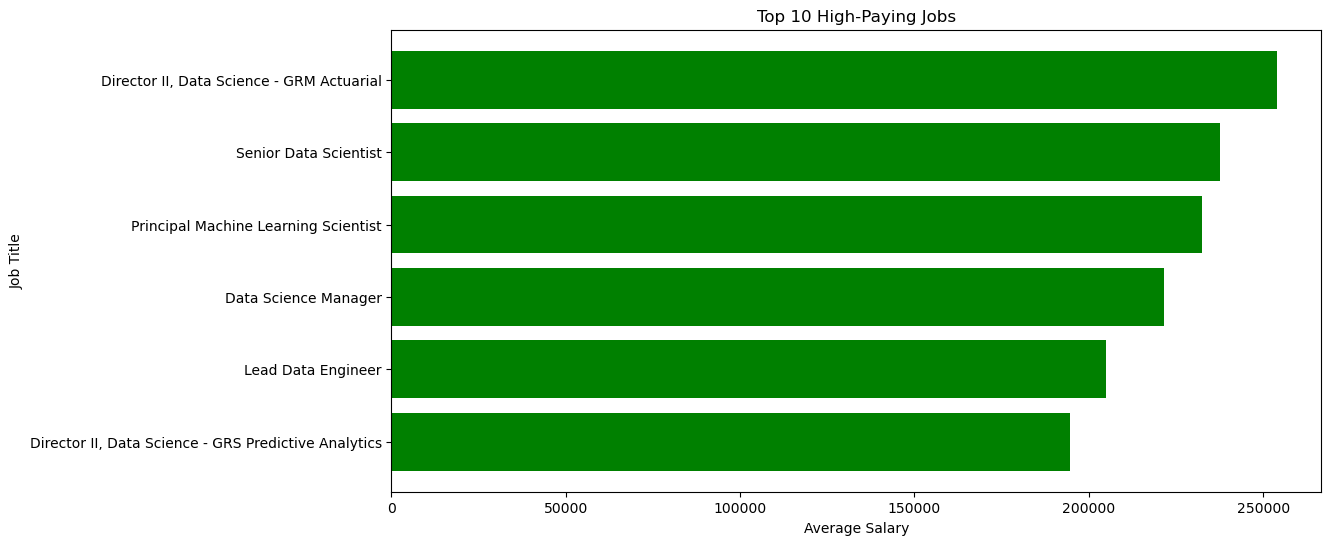

In [151]:
# Bar Chart बनाना
plt.figure(figsize=(12,6))
plt.barh(top_jobs['Job Title'], top_jobs['Average Salary'], color='green')
plt.xlabel("Average Salary")
plt.ylabel("Job Title")
plt.title("Top 10 High-Paying Jobs")
plt.gca().invert_yaxis()  # To bring the highest salary to the top.
plt.show()

In [153]:
import seaborn as sns

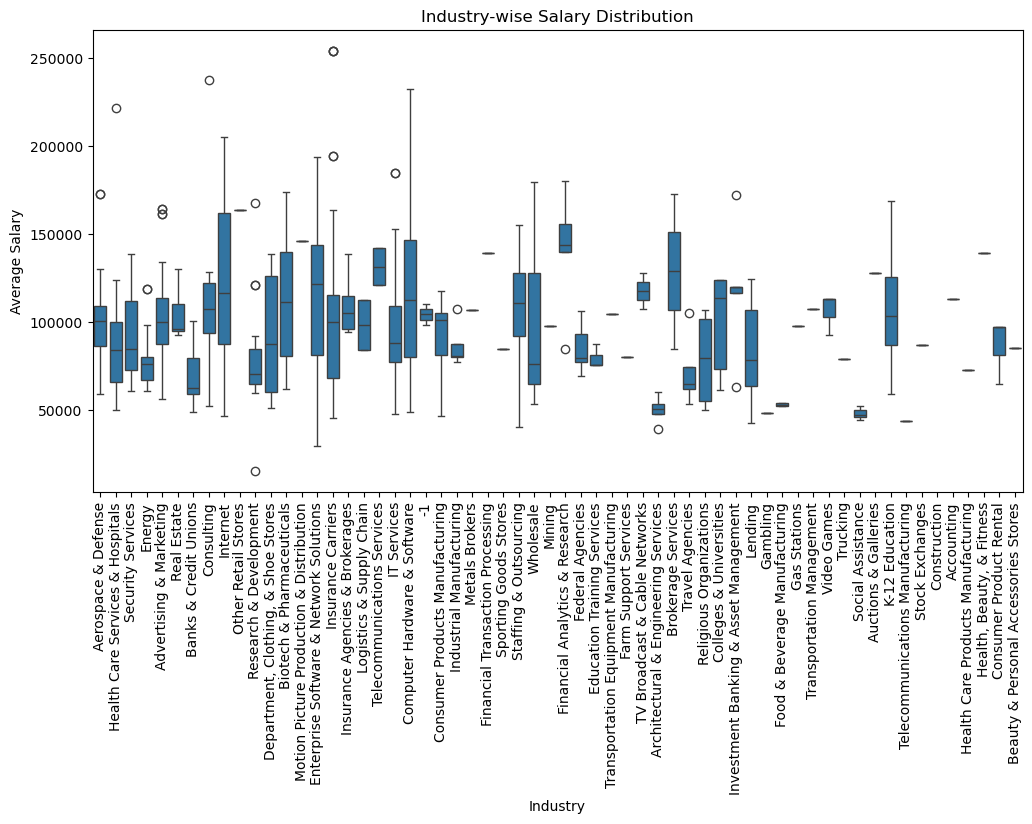

In [155]:
# Box plot for Industry-wise Salary Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Industry"], y=df["Average Salary"])
plt.xticks(rotation=90)
plt.xlabel("Industry")
plt.ylabel("Average Salary")
plt.title("Industry-wise Salary Distribution")
plt.show()

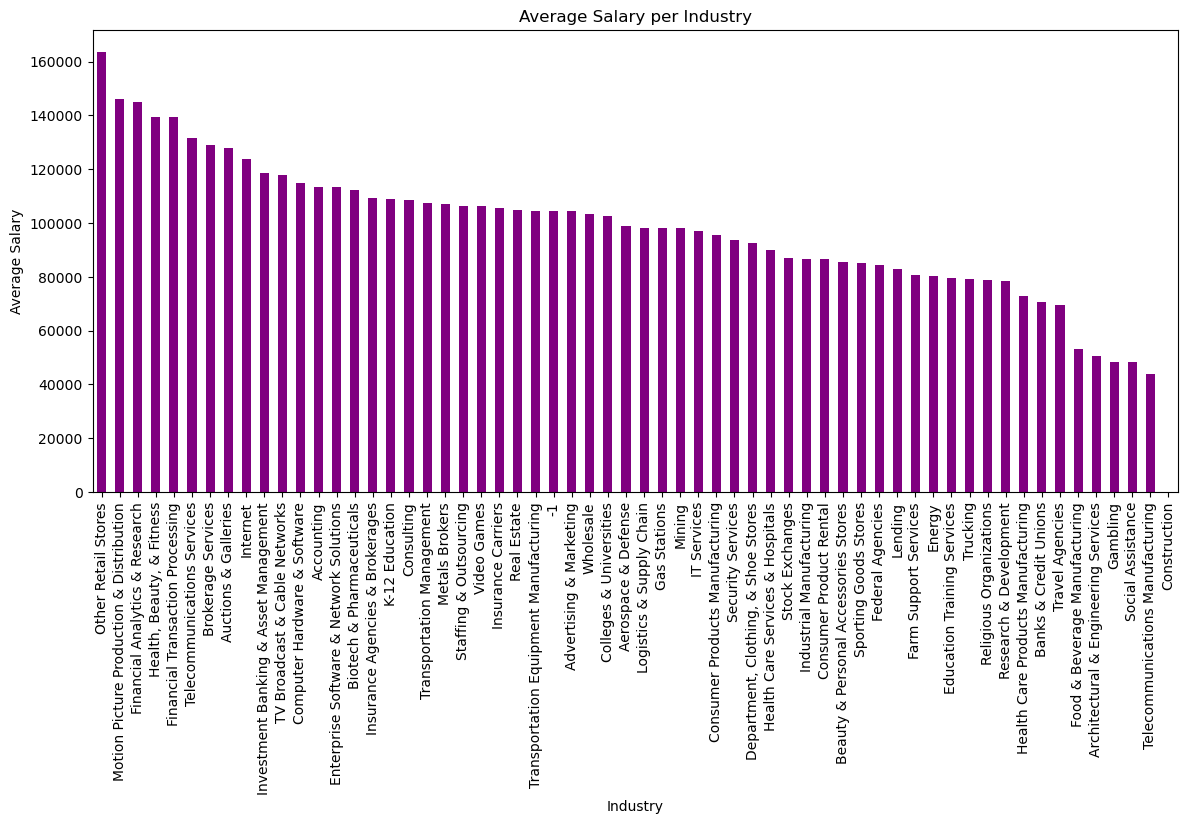

In [41]:
# Industry-wise Average Salary Bar Chart
plt.figure(figsize=(14, 6))
industry_avg_salary = df.groupby("Industry")["Average Salary"].mean().sort_values(ascending=False)
industry_avg_salary.plot(kind="bar", color="purple")
plt.xlabel("Industry")
plt.ylabel("Average Salary")
plt.title("Average Salary per Industry")
plt.xticks(rotation=90)
plt.show()


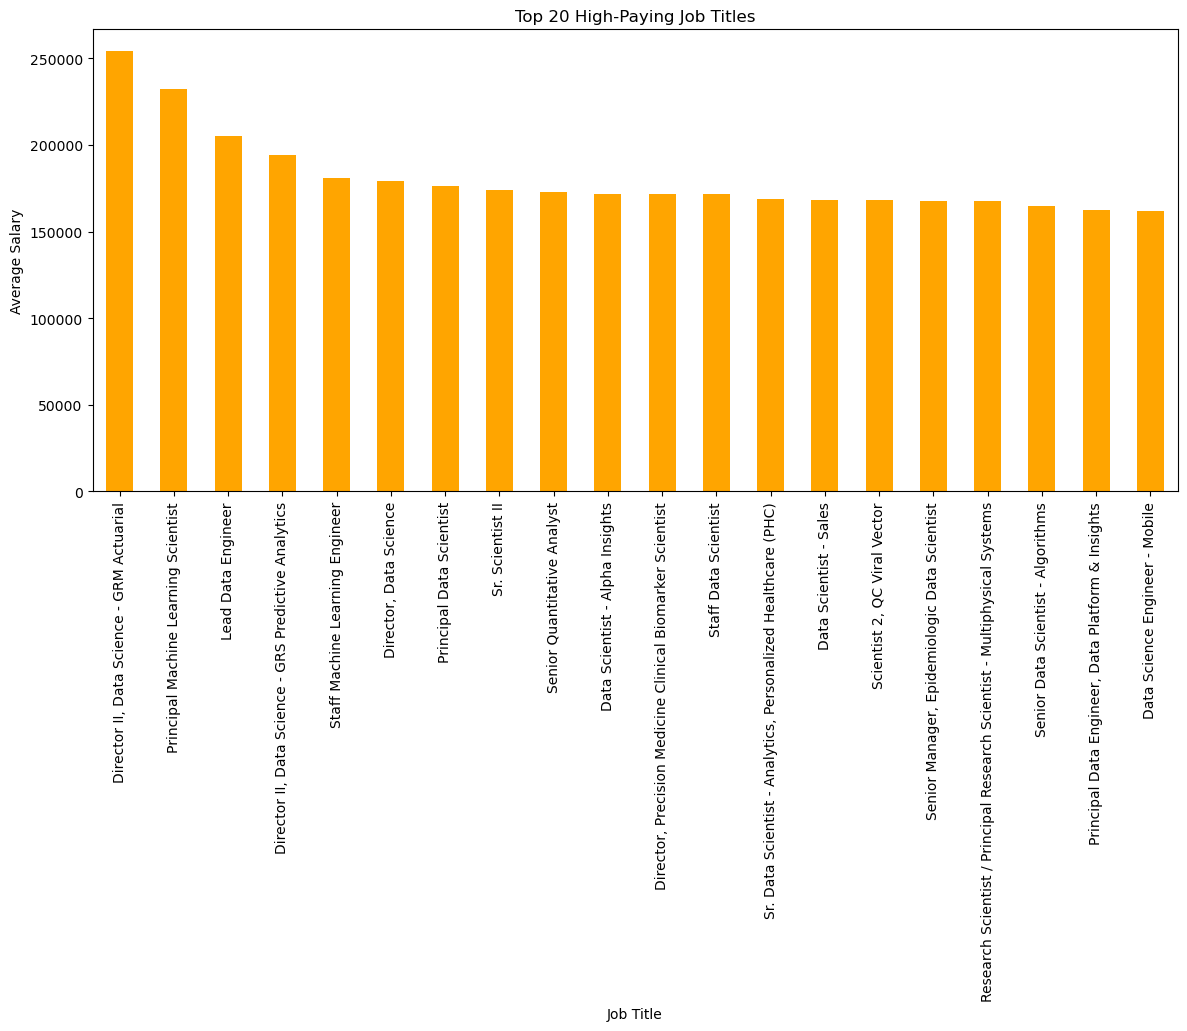

In [157]:
# Job Title-wise Average Salary Bar Chart
plt.figure(figsize=(14, 6))
job_avg_salary = df.groupby("Job Title")["Average Salary"].mean().sort_values(ascending=False).head(20)
job_avg_salary.plot(kind="bar", color="orange")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Top 20 High-Paying Job Titles")
plt.xticks(rotation=90)
plt.show()


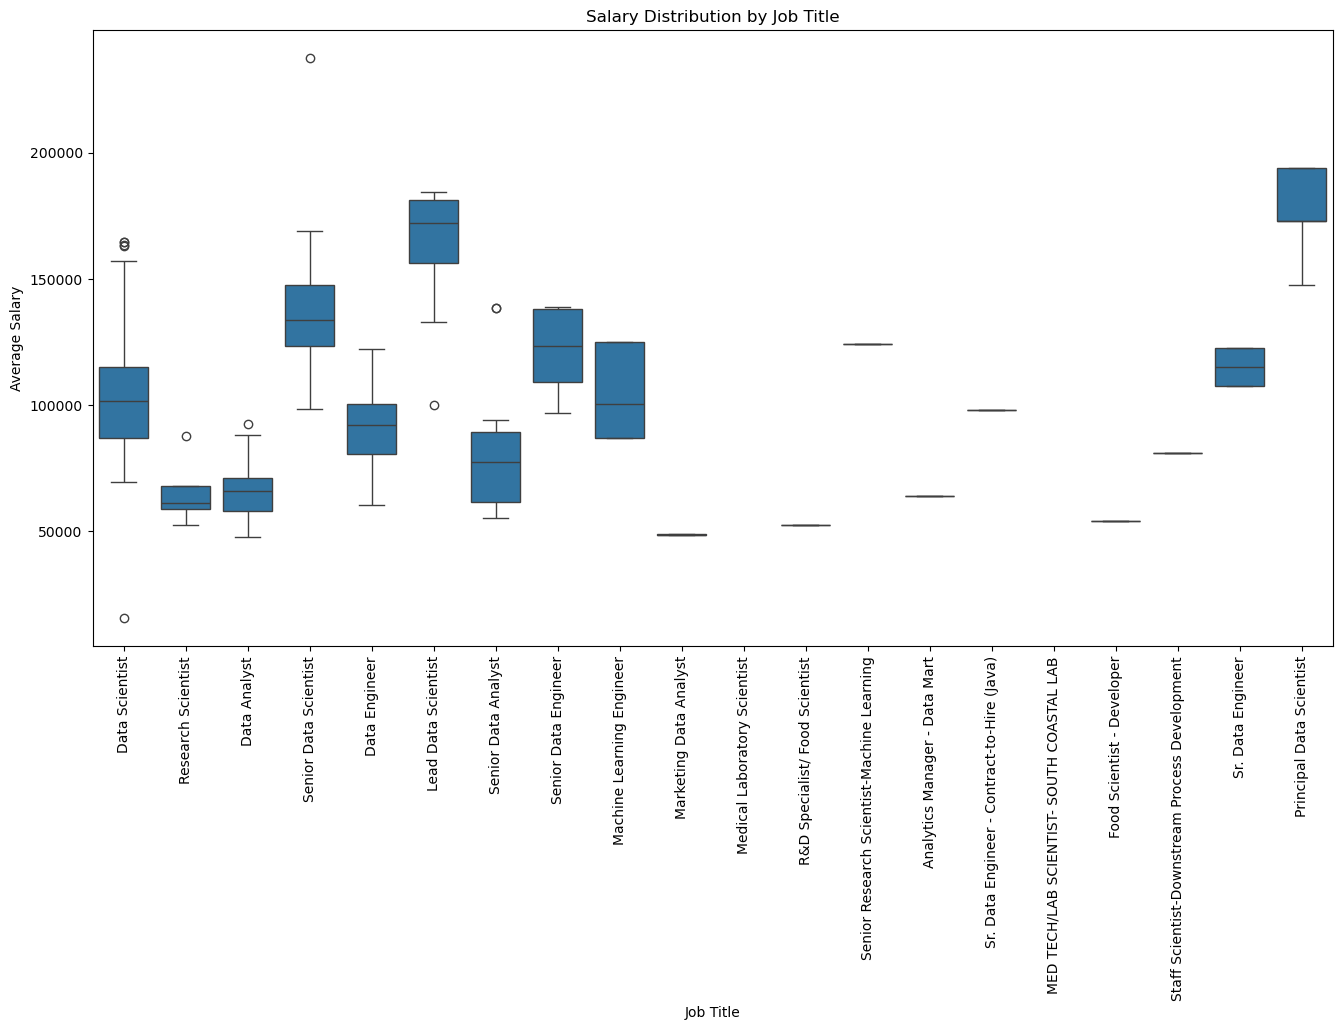

In [159]:
# Salary Distribution by Job Title (Box Plot)
plt.figure(figsize=(16, 8))
top_jobs = df["Job Title"].value_counts().index[:20]  # Select top 20 job titles
sns.boxplot(x=df[df["Job Title"].isin(top_jobs)]["Job Title"], 
            y=df[df["Job Title"].isin(top_jobs)]["Average Salary"])
plt.xticks(rotation=90)
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Salary Distribution by Job Title")
plt.show()


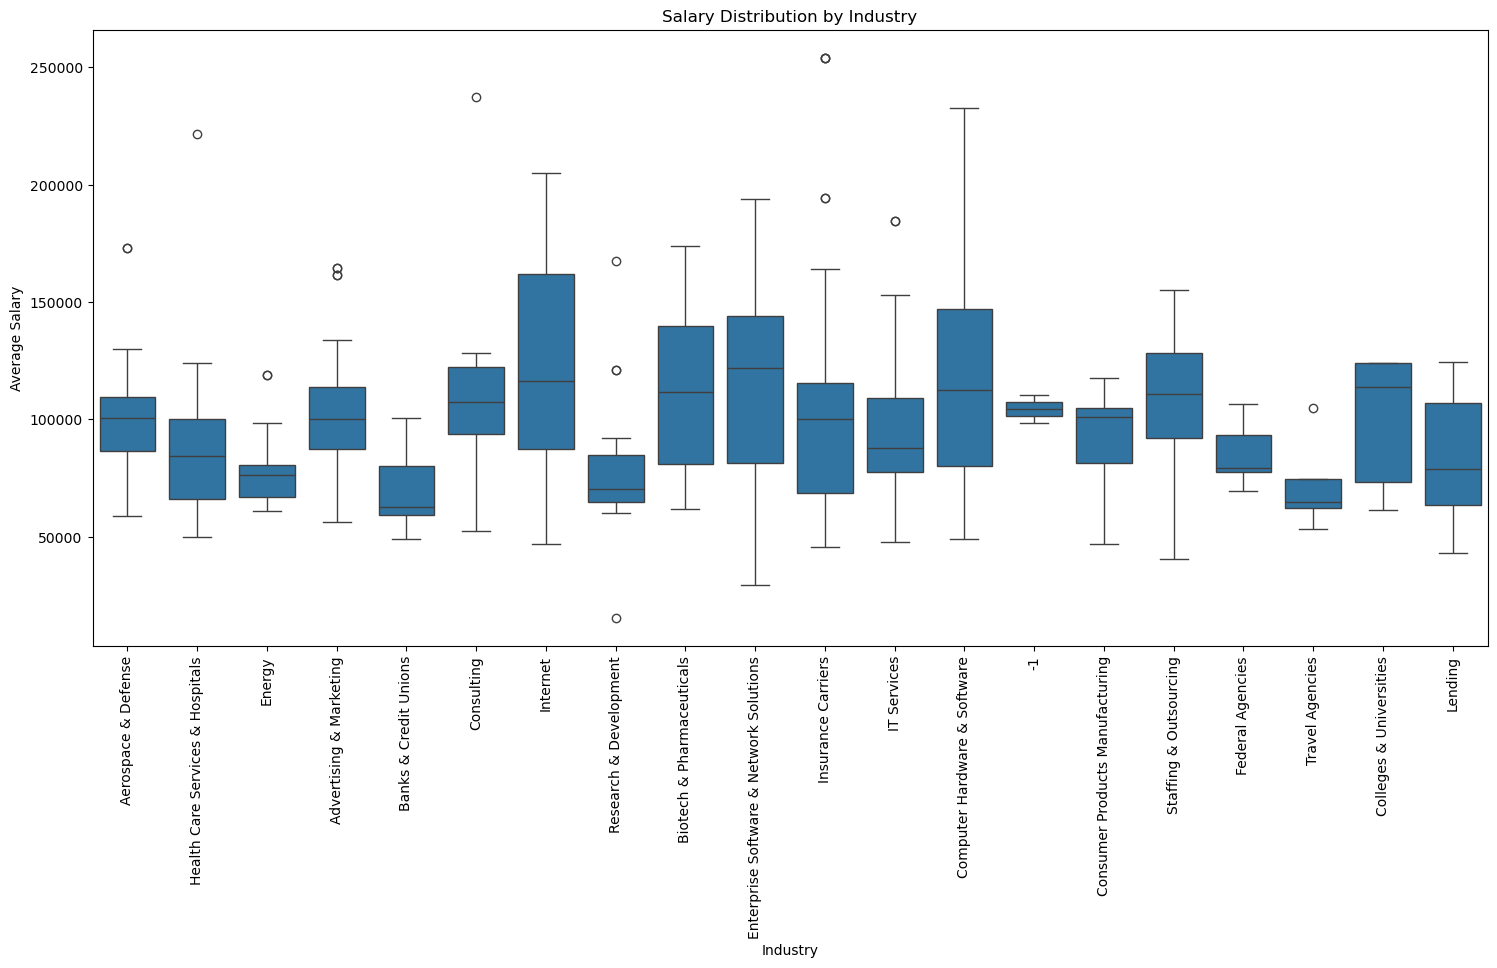

In [47]:
# Industry-wise Salary Distribution (Box Plot)
plt.figure(figsize=(18, 8))
top_industries = df["Industry"].value_counts().index[:20]  # Select top 20 industries
sns.boxplot(x=df[df["Industry"].isin(top_industries)]["Industry"], 
            y=df[df["Industry"].isin(top_industries)]["Average Salary"])
plt.xticks(rotation=90)
plt.xlabel("Industry")
plt.ylabel("Average Salary")
plt.title("Salary Distribution by Industry")
plt.show()


In [161]:
# Experience vs. Salary (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Years of Experience"], y=df["Average Salary"], alpha=0.5)
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")
plt.title("Experience vs. Salary")
plt.show()


KeyError: 'Years of Experience'

<Figure size 1000x600 with 0 Axes>

In [163]:
print(df.columns)


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Average Salary'],
      dtype='object')


In [165]:
# Show first 5 data of Job Description 
print(df["Job Description"].head())



0    Data Scientist\nLocation: Albuquerque, NM\nEdu...
1    What You Will Do:\n\nI. General Summary\n\nThe...
2    KnowBe4, Inc. is a high growth information sec...
3    *Organization and Job ID**\nJob ID: 310709\n\n...
4    Data Scientist\nAffinity Solutions / Marketing...
Name: Job Description, dtype: object


In [167]:
# Check if the word "experience" or "years" is present
df["Job Description"].head(10).apply(lambda x: "experience" in str(x).lower() or "years" in str(x).lower())


0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
8    False
9     True
Name: Job Description, dtype: bool

In [169]:
import re

# Function to extract Experience
def extract_experience(text):
    match = re.search(r'(\d+)\+?\s*years', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None  

# Add New column named "Years of Experience" 
df["Years of Experience"] = df["Job Description"].apply(lambda x: extract_experience(str(x)))

print(df[["Job Description", "Years of Experience"]].head(10))


                                     Job Description  Years of Experience
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...                  NaN
1  What You Will Do:\n\nI. General Summary\n\nThe...                  3.0
2  KnowBe4, Inc. is a high growth information sec...                  3.0
3  *Organization and Job ID**\nJob ID: 310709\n\n...                  1.0
4  Data Scientist\nAffinity Solutions / Marketing...                  NaN
5  CyrusOne is seeking a talented Data Scientist ...                  2.0
6  Job Description\n\n**Please only local candida...                  NaN
7  Advanced Analytics – Lead Data Scientist\nOver...                  NaN
8  SUMMARY\n\nThe Research Scientist I will be ta...                  NaN
9  isn’t your usual company. Our work is powered ...                  NaN


In [171]:
import matplotlib.pyplot as plt

In [173]:
import seaborn as sns

In [177]:
df = df[df["Years of Experience"] <= 30]


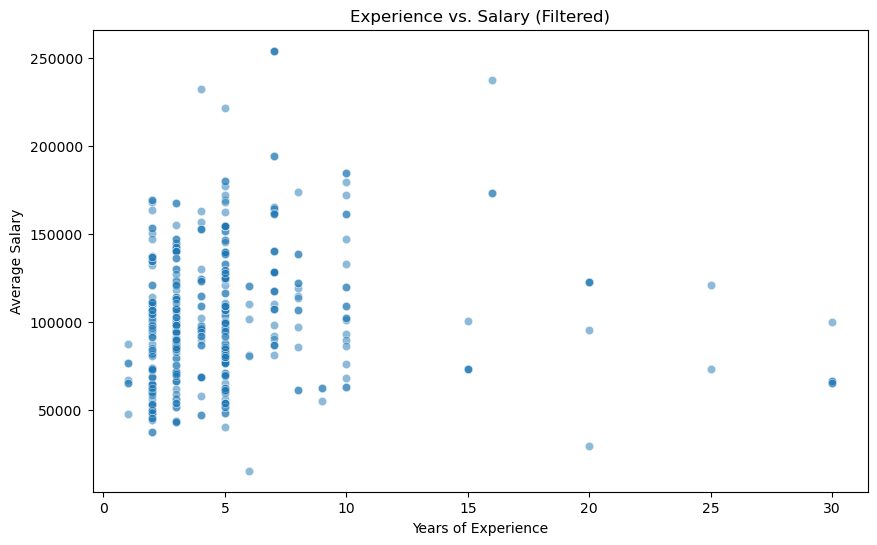

In [179]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Years of Experience"], y=df["Average Salary"], alpha=0.5)
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")
plt.title("Experience vs. Salary (Filtered)")
plt.show()

In [181]:
import numpy as np

Q1 = df['Average Salary'].quantile(0.25)  # 25th percentile
Q3 = df['Average Salary'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

lower_limit = Q1 - 1.5 * IQR  # Lower Bound
upper_limit = Q3 + 1.5 * IQR  # Upper Bound


In [183]:
filtered_df = df[(df['Average Salary'] >= lower_limit) & (df['Average Salary'] <= upper_limit)]


In [185]:
df['Average Salary'] = np.where(df['Average Salary'] > upper_limit, upper_limit, 
                                np.where(df['Average Salary'] < lower_limit, lower_limit, df['Average Salary']))


C:\Users\DELL\AppData\Local\Temp\ipykernel_13552\2224255952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Salary'] = np.where(df['Average Salary'] > upper_limit, upper_limit,


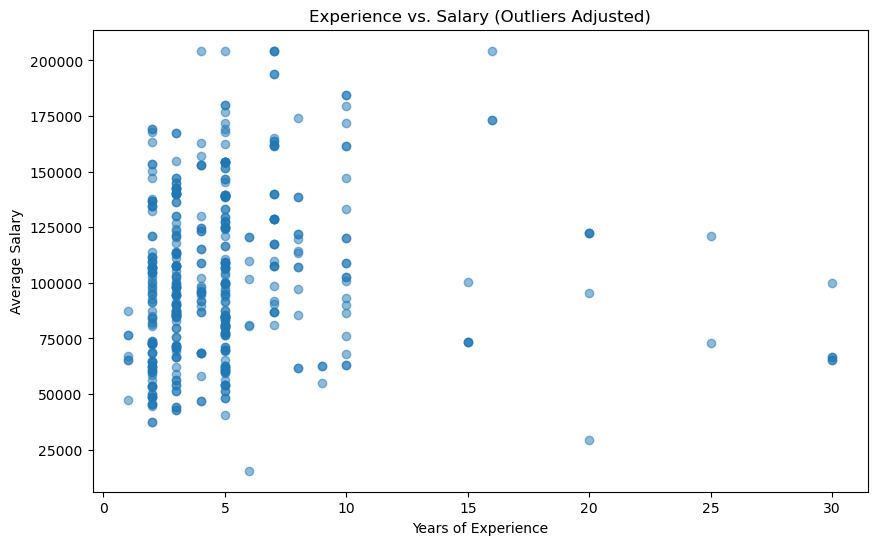

In [187]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Years of Experience'], df['Average Salary'], alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
plt.title('Experience vs. Salary (Outliers Adjusted)')
plt.show()


In [189]:
df[['Years of Experience', 'Average Salary']].corr()


,Years of Experience,Average Salary
Years of Experience,1.000000,0.088995
Average Salary,0.088995,1.000000


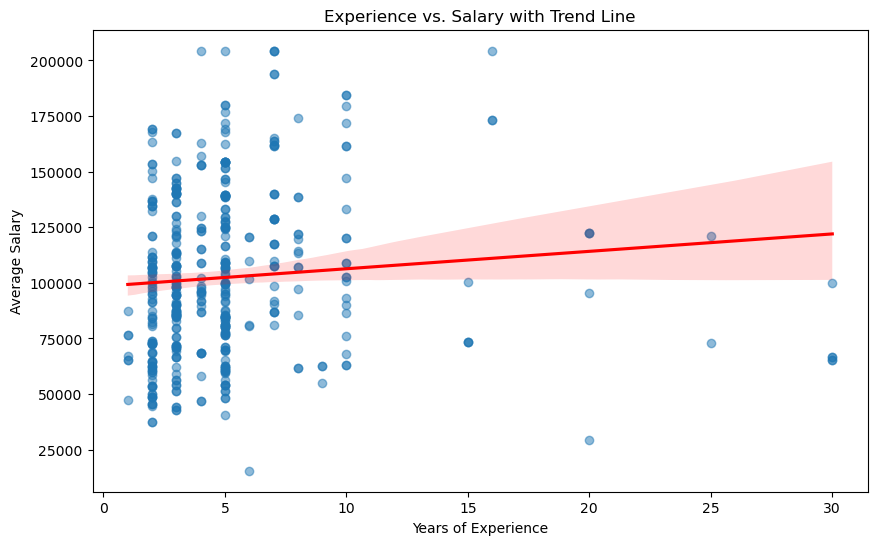

In [191]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.regplot(x=df['Years of Experience'], y=df['Average Salary'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
plt.title('Experience vs. Salary with Trend Line')
plt.show()


In [193]:
df[['Years of Experience', 'Average Salary']].corr()


,Years of Experience,Average Salary
Years of Experience,1.000000,0.088995
Average Salary,0.088995,1.000000


In [203]:
df = df.dropna(subset=['Average Salary'])


In [205]:
df['Average Salary'].fillna(df['Average Salary'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13552\806991311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Salary'].fillna(df['Average Salary'].median(), inplace=True)


In [207]:
from sklearn.linear_model import LinearRegression

X = df[['Years of Experience']]
y = df['Average Salary']

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 98488.69488193447
Coefficient: 783.3909549970595
